  0%|          | 0/170498071 [00:00<?, ?it/s]

Extracting ./pt_data/cifar-10-python.tar.gz to ./pt_data
Category:  8


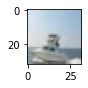

In [1]:
import torchvision
import torchvision.transforms as transforms
from torchvision.datasets import CIFAR10
from torch.utils.data import DataLoader
import numpy as np
import matplotlib.pyplot as plt

# Load training dataset into a single batch.
transform = transforms.Compose([transforms.ToTensor()])
trainset = CIFAR10(root='./pt_data', train=True, download=True, transform=transform)
trainloader = DataLoader(trainset, batch_size=len(trainset), shuffle=False)
data = next(iter(trainloader))

# Convert to numpy arrays of correct shape for plotting.
train_images = data[0].numpy()
train_images = np.moveaxis(train_images, 1, 3)
train_labels = data[1].numpy()

print('Category: ', train_labels[100])
plt.figure(figsize=(1, 1))
plt.imshow(train_images[100])
plt.show()

# 새 섹션

In [4]:
!pip install requests

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [5]:
import requests
url='https://raw.githubusercontent.com/NVDLI/LDL/main/pt_framework/utilities.py'
r=requests.get(url)

with open('utilities.py', 'w') as f:
  f.write(r.text)

In [6]:
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
from torchvision.datasets import CIFAR10
from torch.utils.data import DataLoader
import numpy as np
from utilities import train_model

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
EPOCHS = 128
BATCH_SIZE=32

transform=transforms.Compose([transforms.ToTensor()])
trainset=CIFAR10(root='./pt_data', train=True, download=True, transform=transform)
trainloader=DataLoader(trainset, batch_size=len(trainset), shuffle=False)
data=next(iter(trainloader))
mean=data[0].mean()
stddev=data[0].std()

Files already downloaded and verified


In [7]:
transform=transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize(mean, stddev)])

trainset=CIFAR10(root='./pt_data', train=True, download=True, transform=transform)
testset=CIFAR10(root='./pt_data', train=False, download=True, transform=transform)

model=nn.Sequential(
    nn.Conv2d(3, 64, 5, stride=2, padding=2),
    nn.ReLU(),
    nn.Conv2d(64, 64, 3, stride=2, padding=1),
    nn.ReLU(),
    nn.Flatten(),
    nn.Linear(64*8*8, 10)
)

Files already downloaded and verified
Files already downloaded and verified


In [8]:
layers=next(model.modules())
conv_layer0=layers[0]
conv_layer1=layers[2]
output_layer=layers[5]

nn.init.kaiming_normal_(conv_layer0.weight)
nn.init.constant_(conv_layer0.bias, 0.0)
nn.init.kaiming_normal_(conv_layer1.weight)
nn.init.constant_(conv_layer1.bias, 0.0)

nn.init.xavier_uniform_(output_layer.weight)
nn.init.constant_(output_layer.bias, 0.0)

optimizer=torch.optim.Adam(model.parameters())
loss_function=nn.CrossEntropyLoss()

train_model(model, device, EPOCHS, BATCH_SIZE, trainset, testset, optimizer, loss_function, 'acc')

Epoch 1/128 loss: 1.3900 - acc: 0.5121 - val_loss: 1.1876 - val_acc: 0.5833
Epoch 2/128 loss: 1.0566 - acc: 0.6329 - val_loss: 1.0782 - val_acc: 0.6262
Epoch 3/128 loss: 0.9132 - acc: 0.6803 - val_loss: 1.0454 - val_acc: 0.6417
Epoch 4/128 loss: 0.8176 - acc: 0.7161 - val_loss: 1.0441 - val_acc: 0.6479
Epoch 5/128 loss: 0.7370 - acc: 0.7431 - val_loss: 1.0841 - val_acc: 0.6480
Epoch 6/128 loss: 0.6747 - acc: 0.7653 - val_loss: 1.0854 - val_acc: 0.6440
Epoch 7/128 loss: 0.6121 - acc: 0.7849 - val_loss: 1.1360 - val_acc: 0.6460
Epoch 8/128 loss: 0.5595 - acc: 0.8022 - val_loss: 1.2068 - val_acc: 0.6408
Epoch 9/128 loss: 0.5085 - acc: 0.8219 - val_loss: 1.2989 - val_acc: 0.6306
Epoch 10/128 loss: 0.4709 - acc: 0.8329 - val_loss: 1.3312 - val_acc: 0.6370
Epoch 11/128 loss: 0.4271 - acc: 0.8487 - val_loss: 1.4438 - val_acc: 0.6313
Epoch 12/128 loss: 0.3944 - acc: 0.8608 - val_loss: 1.5676 - val_acc: 0.6403
Epoch 13/128 loss: 0.3675 - acc: 0.8665 - val_loss: 1.5884 - val_acc: 0.6318
Epoch 14

[0.9774672104926424, 0.6061301916932907]